In [1]:
config Completer.use_jedi = False

In [2]:
from cvae_test import cVAE
import torch
import numpy as np
import mdtraj as md
from utils import voxel_gauss, avg_blob, rigid_transform
from tqdm.notebook import tqdm
import pytorch_lightning as pl

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
#path = 'CLN_params.csv'
#path = '/project2/andrewferguson/Kirill/c2f_vae_final/CLN_logs/R4/checkpoints/N-Step-Checkpoint.ckpt'
#path = '/project2/andrewferguson/Kirill/c2f_vae_final/CLN_logs_BONDS/R3/checkpoints/N-Step-Checkpoint.ckpt'
#path = '/project2/andrewferguson/Kirill/c2f_vae_final/CLN_logs_v1/R4/checkpoints/N-Step-Checkpoint.ckpt'

path = '/project2/andrewferguson/Kirill/c2f_vae_final/CLN_logs_final/R1/checkpoints/N-Step-Checkpoint.ckpt'
hparams_path = '/project2/andrewferguson/Kirill/c2f_vae_final/CLN_logs_final/R1/hparams.yaml'

In [5]:
#hparams = pl.core.saving.load_hparams_from_tags_csv('CLN_params.csv')

In [6]:
hparams = pl.core.saving.load_hparams_from_yaml(hparams_path)
model = cVAE.load_from_checkpoint(checkpoint_path=path,map_location=device).to(device)
model.eval()
model.device

device(type='cuda', index=0)

In [7]:
model.setup(None)

Atoms in AA: ['CAY', 'HY1', 'HY2', 'HY3', 'CY', 'OY', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'CD1', 'HD1', 'CE1', 'HE1', 'CZ', 'OH', 'HH', 'CD2', 'HD2', 'CE2', 'HE2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'CD1', 'HD1', 'CE1', 'HE1', 'CZ', 'OH', 'HH', 'CD2', 'HD2', 'CE2', 'HE2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'OD1', 'OD2', 'C', 'O', 'N', 'CD', 'HD3', 'HD2', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'HG3', 'HG2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'HG3', 'HG2', 'CD', 'OE1', 'OE2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB', 'OG1', 'HG1', 'CG2', 'HG21', 'HG22', 'HG23', 'C', 'O', 'N', 'H', 'CA', 'HA3', 'HA2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB', 'OG1', 'HG1', 'CG2', 'HG21', 'HG22', 'HG23', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'CD1', 'HD1', 'NE1', 'HE1', 'CE2', 'CD2', 'CE3', 'HE3', 'CZ3', 'HZ3', 'CZ2', 'HZ2', 'CH2', 'HH2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'CD1', 'H

In [8]:
z, Energies = model.estimate_latent_space_density()

Fitting GMM to posterior latent space density...


In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.stats import pearsonr
sns.set(style='white')

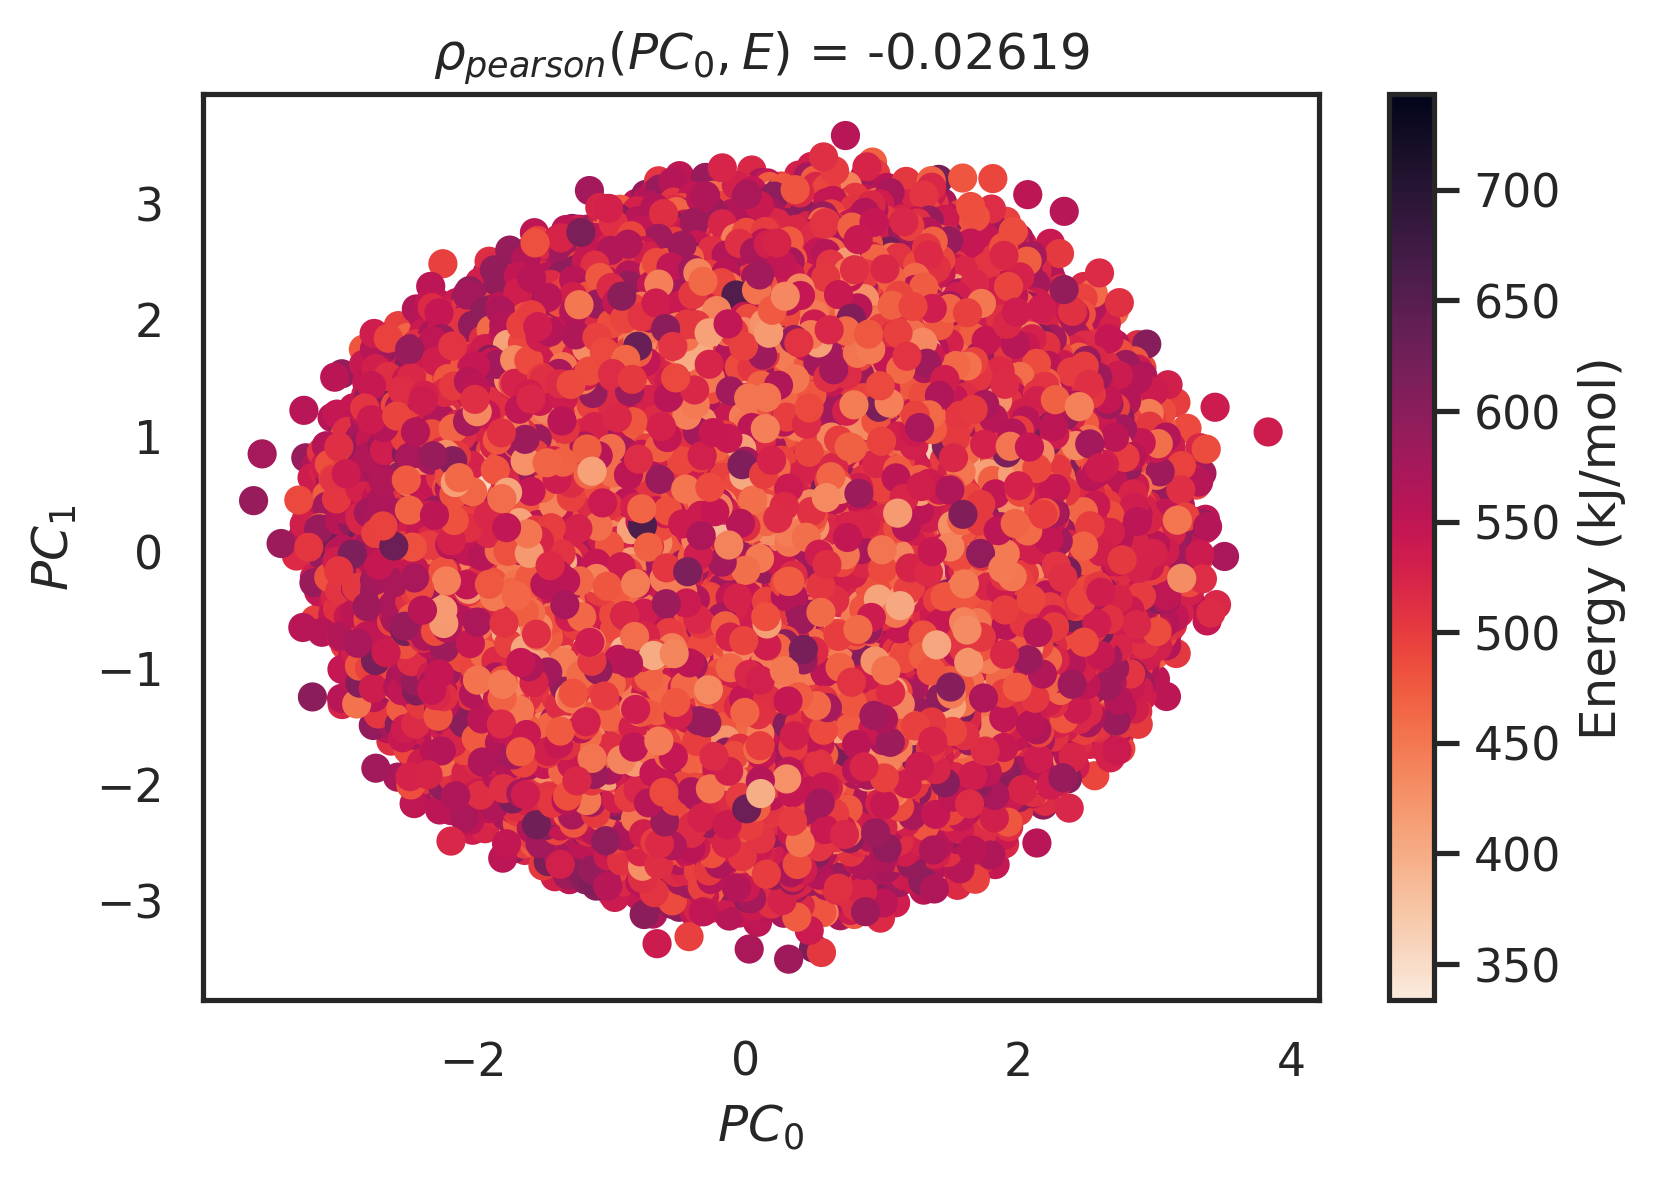

In [10]:
pca = PCA(n_components=2)
z_pca = pca.fit_transform(z)
plt.figure(dpi=300)
cmap = ListedColormap(sns.color_palette("rocket_r", n_colors=256).as_hex())
im = plt.scatter(z_pca[:, 0], z_pca[:, 1], c=Energies.flatten(), cmap=cmap)
plt.colorbar(im, orientation='vertical', label='Energy (kJ/mol)')
plt.title("$\\rho_{pearson}(PC_0, E)$ = " + f'{pearsonr(z_pca[:, 0], Energies.flatten())[0]:.4g}')
plt.xlabel('$PC_0$')
plt.ylabel('$PC_1$')
plt.show() #0.7261, 0.7691 for BONDS, 

In [5]:
hparams

{'path': '/project2/andrewferguson/Kirill/midway3_c2f/chig_new/',
 'aa_traj': 'AA.dcd',
 'aa_pdb': 'AA.pdb',
 'cg_traj': 'CG.dcd',
 'cg_pdb': 'CG.pdb',
 'n_atoms_aa': 175,
 'n_atoms_cg': 10,
 'sigma': 0.30756510283121685,
 'resolution': 12,
 'length': 5.5,
 'n_frames': 2,
 'num_workers': 8,
 'batch_size': 32,
 'learning_rate': 0.00042333235887203046,
 'latent_dim': 64,
 'fac_encoder': 16,
 'fac_decoder': 8,
 'train_percent': 0.975,
 'E_mu': 504.8884,
 'E_std': 48.551476,
 'save_every_n_steps': 6000,
 'hallucinate_every_n_epochs': 5,
 'use_edm_loss': 1,
 'use_coord_loss': True,
 'use_cg_loss': 1,
 'bonds_edm_weight': 1.0,
 'cg_coord_weight': 1.0,
 'coord_weight': 1.0,
 'beta': 1.0,
 'learning_gamma': 1.0,
 'default_save_path': '',
 'log_path': './',
 'mol_name': 'CLN',
 'tops_fname': '/project2/andrewferguson/Kirill/midway3_c2f/charmm_tops',
 'energy_loss_after_n_steps': 750000,
 'energy_loss_gradient_clip_val': 0.1,
 'energy_weight_start': 1e-06,
 'energy_weight_end': 1.0,
 'energy_wei

In [20]:
hparams['energy_loss_clamp'] > 0

False

In [14]:
pl.core.saving.save_hparams_to_tags_csv('ADP_params.csv', hparams)

In [26]:
device = torch.device('cuda')

In [4]:
ckpt = torch.load('CLN.ckpt')

In [5]:
import pytorch_lightning as pl

In [8]:
pl.core.saving.save_hparams_to_tags_csv('CLN_params.csv', ckpt['hyper_parameters'])

In [6]:
ckpt['hyper_parameters']['energy_weight_start'] = 1e-6

In [9]:
ckpt['hyper_parameters']['num_workers'] = 8

In [11]:
ks = [k for k in ckpt['state_dict'].keys() if k.startswith('Emlp')]

In [13]:
for k in ks:
    del ckpt['state_dict'][k]

In [21]:
del ckpt['hyper_parameters']['n_frames_past']
del ckpt['hyper_parameters']['use_recon_energy_loss']
del ckpt['hyper_parameters']['use_diff_loss']
del ckpt['hyper_parameters']['GMM_estimate']
del ckpt['hyper_parameters']['gamma']
del ckpt['hyper_parameters']['skip_E_calcs']
del ckpt['hyper_parameters']['test_tube_slurm_cmd_path']
del ckpt['hyper_parameters']['hpc_exp_number']
del ckpt['hyper_parameters']['noise']

In [22]:
ckpt['hyper_parameters']['mol_name'] = 'CLN'
ckpt['hyper_parameters']['tops_fname'] = '/project2/andrewferguson/Kirill/midway3_c2f/charmm_tops'
ckpt['hyper_parameters']['energy_loss_after_n_steps'] = 750000
ckpt['hyper_parameters']['energy_loss_gradient_clip_val'] = 0.1
ckpt['hyper_parameters']['energy_weight_start'] = 1e-5
ckpt['hyper_parameters']['energy_weight_end'] = 1.0
ckpt['hyper_parameters']['energy_weight_anneal_steps'] = 1250000

In [5]:
ckpt['hyper_parameters']['energy_loss_clamp'] = True

In [6]:
torch.save(ckpt, 'CLN.ckpt')

In [3]:
model = cVAE.load_from_checkpoint(checkpoint_path='/project2/andrewferguson/Kirill/midway3_c2f/CLN_twoGPU/version_8RRRRRRRRRRRRRRRRR/checkpoints/N-Step-Checkpoint.ckpt', mol_name='CLN', tops_fname = '/project2/andrewferguson/Kirill/midway3_c2f/charmm_tops', strict=False).to(device)
model.eval()
model.device

device(type='cuda', index=0)

In [27]:
model = cVAE.load_from_checkpoint(checkpoint_path='CLN.ckpt').to(device)
model.eval()
model.device

device(type='cuda', index=0)

In [28]:
model.setup(None)

Atoms in AA: ['CAY', 'HY1', 'HY2', 'HY3', 'CY', 'OY', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'CD1', 'HD1', 'CE1', 'HE1', 'CZ', 'OH', 'HH', 'CD2', 'HD2', 'CE2', 'HE2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'CD1', 'HD1', 'CE1', 'HE1', 'CZ', 'OH', 'HH', 'CD2', 'HD2', 'CE2', 'HE2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'OD1', 'OD2', 'C', 'O', 'N', 'CD', 'HD3', 'HD2', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'HG3', 'HG2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'HG3', 'HG2', 'CD', 'OE1', 'OE2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB', 'OG1', 'HG1', 'CG2', 'HG21', 'HG22', 'HG23', 'C', 'O', 'N', 'H', 'CA', 'HA3', 'HA2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB', 'OG1', 'HG1', 'CG2', 'HG21', 'HG22', 'HG23', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'CD1', 'HD1', 'NE1', 'HE1', 'CE2', 'CD2', 'CE3', 'HE3', 'CZ3', 'HZ3', 'CZ2', 'HZ2', 'CH2', 'HH2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'CD1', 'H

In [29]:
z, Energies = model.estimate_latent_space_density()

Fitting GMM to posterior latent space density...


In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.stats import pearsonr
sns.set(style='white')

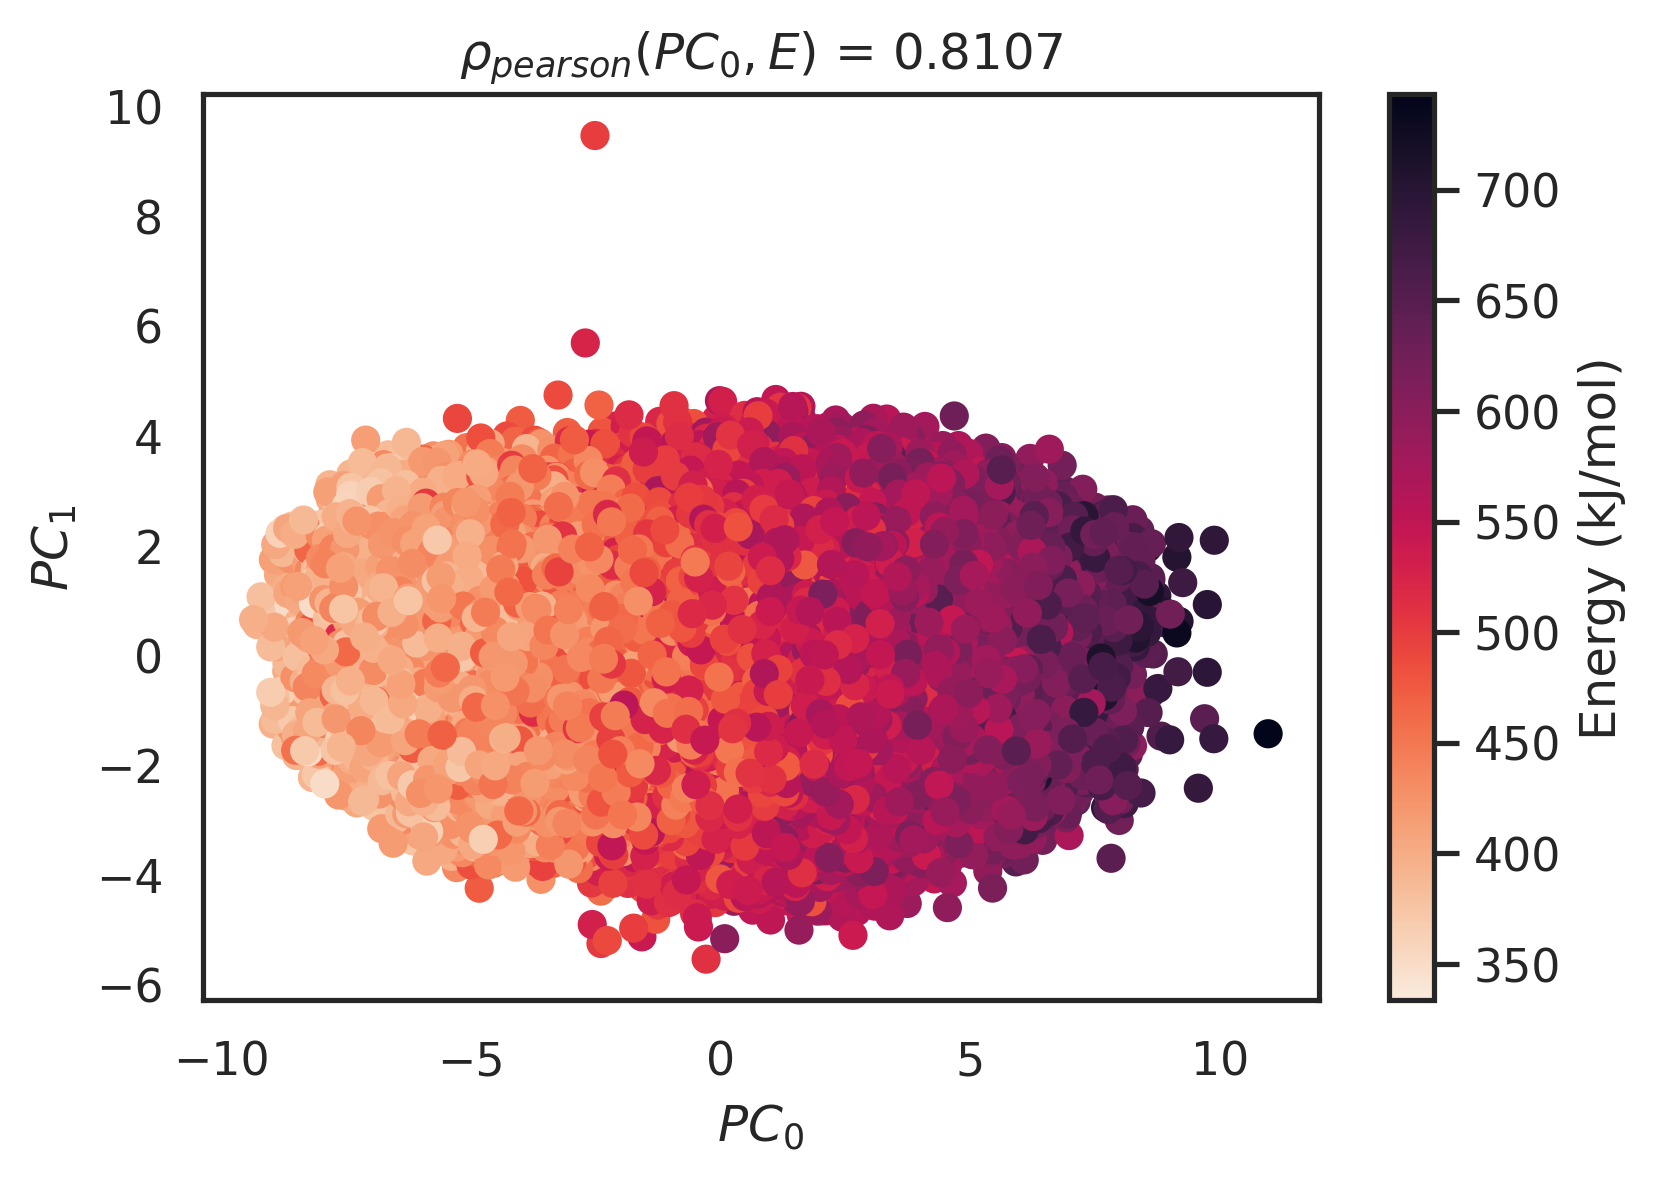

In [31]:
pca = PCA(n_components=2)
z_pca = pca.fit_transform(z)
plt.figure(dpi=300)
cmap = ListedColormap(sns.color_palette("rocket_r", n_colors=256).as_hex())
im = plt.scatter(z_pca[:, 0], z_pca[:, 1], c=Energies.flatten(), cmap=cmap)
plt.colorbar(im, orientation='vertical', label='Energy (kJ/mol)')
plt.title("$\\rho_{pearson}(PC_0, E)$ = " + f'{pearsonr(z_pca[:, 0], Energies.flatten())[0]:.4g}')
plt.xlabel('$PC_0$')
plt.ylabel('$PC_1$')
plt.show()

In [38]:
model.cg_trajs

[<mdtraj.Trajectory with 500 frames, 10 atoms, 10 residues, and unitcells at 0x7f20a860d250>,
 <mdtraj.Trajectory with 500 frames, 10 atoms, 10 residues, and unitcells at 0x7f20a85c2510>,
 <mdtraj.Trajectory with 500 frames, 10 atoms, 10 residues, and unitcells at 0x7f20a8575890>,
 <mdtraj.Trajectory with 500 frames, 10 atoms, 10 residues, and unitcells at 0x7f20a85417d0>,
 <mdtraj.Trajectory with 500 frames, 10 atoms, 10 residues, and unitcells at 0x7f20a84f76d0>,
 <mdtraj.Trajectory with 500 frames, 10 atoms, 10 residues, and unitcells at 0x7f20a856fc50>,
 <mdtraj.Trajectory with 500 frames, 10 atoms, 10 residues, and unitcells at 0x7f20a84f7750>,
 <mdtraj.Trajectory with 500 frames, 10 atoms, 10 residues, and unitcells at 0x7f20a84f7250>,
 <mdtraj.Trajectory with 500 frames, 10 atoms, 10 residues, and unitcells at 0x7f20a84df910>,
 <mdtraj.Trajectory with 500 frames, 10 atoms, 10 residues, and unitcells at 0x7f20a84df750>,
 <mdtraj.Trajectory with 500 frames, 10 atoms, 10 residues, 

In [11]:
n_train = int(len(model.aa_trajs) * model.hparams.train_percent)

In [12]:
def hallucinate(cg_test_trj, aa_test_trj, name_num):
    cg_test_data = cg_test_trj.xyz

    for i, cg_traj in tqdm(enumerate(model.cg_trajs[:n_train]), total=len(model.cg_trajs[:n_train]), leave=False):
        if i == 0:
            aa_trj_min = 0
            best_min = np.inf
            continue
        else:
            rmsd_min = md.rmsd(cg_traj, cg_test_trj, frame=0).min()
            if rmsd_min < best_min:
                aa_trj_min = i
                best_min = rmsd_min
                aa_argmin = md.rmsd(cg_traj, cg_test_trj, frame=0).argmin()

    aa_0 = model.aa_trajs[:n_train][aa_trj_min][aa_argmin]
    R, t = rigid_transform(aa_0.atom_slice(model.cg_idxs).xyz[0], cg_test_trj.xyz[0])
    aa_0 = model.aa_trajs[:n_train][aa_trj_min][aa_argmin - 1]
    aa_0.xyz = aa_0.xyz @ R + t

    with torch.no_grad():
        aa_vox_current = voxel_gauss(
            torch.Tensor(aa_0[0].xyz).to(model.device),
            res=model.hparams.resolution,
            width=model.hparams.length,
            sigma=model.hparams.sigma,
            device=model.device)

        fake_coords = list()
        for i in tqdm(range(cg_test_trj.n_frames), leave=False):
            cg_vox = voxel_gauss(
                torch.Tensor(cg_test_trj[i].xyz).to(model.device),
                res=model.hparams.resolution,
                width=model.hparams.length,
                sigma=model.hparams.sigma,
                device=model.device)

            condition = torch.cat((cg_vox, aa_vox_current), dim=1)
            
            z = model.sample_GMM_latent_space()

            recon_aa_vox = model.decode(z, condition)

            aa_fake = avg_blob(
                recon_aa_vox,
                res=model.hparams.resolution,
                width=model.hparams.length,
                sigma=model.hparams.sigma,
                device=model.device,
            )
            aa_fake = aa_fake - aa_fake.mean(dim=1)
            fake_coords.append(aa_fake)

            aa_vox_current = voxel_gauss(
                aa_fake,
                res=model.hparams.resolution,
                width=model.hparams.length,
                sigma=model.hparams.sigma,
                device=model.device)

    hallucinate_coords = torch.cat(fake_coords, dim=0)
    hallucinate_trj = md.Trajectory(hallucinate_coords.detach().cpu().numpy(), topology=model.aa_traj.top).center_coordinates()
    hallucinate_trj.save_dcd(f'CLN_testset/hallucinated_{name_num}.dcd')
    cg_test_trj.save_dcd(f'CLN_testset/CG_{name_num}.dcd')
    aa_test_trj.save_dcd(f'CLN_testset/AA_{name_num}.dcd')

In [13]:
for i, (cg, aa) in tqdm(enumerate(zip(model.cg_trajs[n_train:], model.aa_trajs[n_train:])), total=len(model.cg_trajs[n_train:])):
    hallucinate(cg, aa, i)